In [1]:
import pandas as pd
import warnings 
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Propsih/test/main/data_test.csv', sep=';')

In [3]:
df.head()

,CLIENT_ID,VALUE_DAY,DIGITAL_30_CNT,TRAN_ACTIVE_30_CNT,OPER_ACTIVE_30_CNT
0,3596869440,30.09.2021,18.0,8.0,9.0
1,181778433,30.09.2021,7.0,3.0,3.0
2,4271531990,30.09.2021,2.0,0.0,0.0
3,3949165697,30.09.2021,15.0,4.0,5.0
4,1926920317,30.09.2021,3.0,0.0,0.0


In [4]:
df.shape

(805821, 5)

In [5]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805821 entries, 0 to 805820
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CLIENT_ID           805821 non-null  int64  
 1   VALUE_DAY           805821 non-null  object 
 2   DIGITAL_30_CNT      711169 non-null  float64
 3   TRAN_ACTIVE_30_CNT  711169 non-null  float64
 4   OPER_ACTIVE_30_CNT  711169 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 76.1 MB


In [6]:
cols = [col.lower() for col in df.columns]
df.set_axis(cols, axis=1, inplace=True)

In [8]:
df['value_day'] = pd.to_datetime(df['value_day'])

In [9]:
df

,client_id,value_day,digital_30_cnt,tran_active_30_cnt,oper_active_30_cnt
0,3596869440,2021-09-30,18.0,8.0,9.0
1,181778433,2021-09-30,7.0,3.0,3.0
2,4271531990,2021-09-30,2.0,0.0,0.0
3,3949165697,2021-09-30,15.0,4.0,5.0
4,1926920317,2021-09-30,3.0,0.0,0.0
...,...,...,...,...,...
805816,4243322997,2022-02-28,2.0,0.0,0.0
805817,67461867,2022-02-28,3.0,0.0,0.0
805818,302417315,2022-02-28,NaN,NaN,NaN
805819,1780553365,2022-02-28,4.0,0.0,2.0


In [10]:
min(df['value_day']), max(df['value_day'])

(Timestamp('2021-09-30 00:00:00'), Timestamp('2022-02-28 00:00:00'))

In [11]:
active_user = df.query('~digital_30_cnt.isna() | ~tran_active_30_cnt.isna() | ~oper_active_30_cnt.isna()')

In [12]:
nonactive_user = df.query('digital_30_cnt.isna() | tran_active_30_cnt.isna() | oper_active_30_cnt.isna()')

In [13]:
total_active = active_user.groupby('value_day')['client_id'] \
    .agg('count') \
    .reset_index() \
    .rename(columns={'client_id':'total_active'}) 

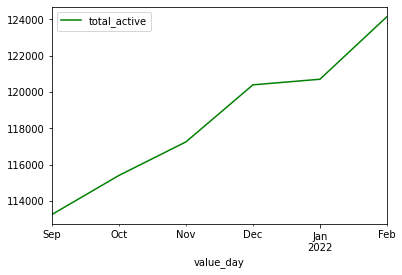

In [14]:
total_active.plot(x='value_day', color='green');

In [15]:
total_digital = active_user \
    .query('digital_30_cnt != 0') \
    .groupby('value_day')['client_id'] \
    .agg('count') \
    .reset_index() \
    .rename(columns={'client_id':'total_digital'}) 

In [16]:
total_oper = active_user \
    .query('oper_active_30_cnt != 0') \
    .groupby('value_day')['client_id'] \
    .agg('count') \
    .reset_index() \
    .rename(columns={'client_id':'total_oper'}) 

In [17]:
total_tran = active_user \
    .query('tran_active_30_cnt != 0') \
    .groupby('value_day')['client_id'] \
    .agg('count') \
    .reset_index() \
    .rename(columns={'client_id':'total_tran'})

<AxesSubplot:xlabel='value_day'>

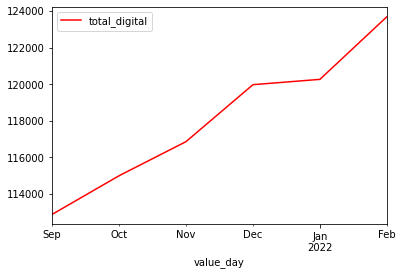

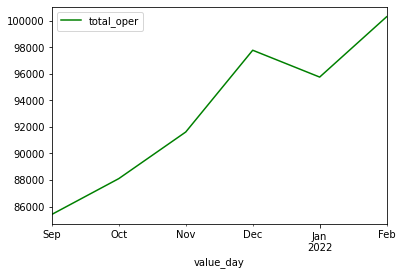

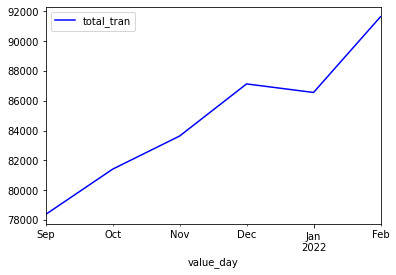

In [18]:
total_digital.plot(x='value_day', color='red'); total_oper.plot(x='value_day', color='green');
total_tran.plot(x='value_day', color='blue')

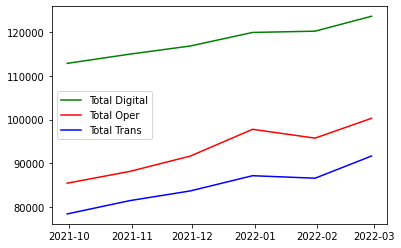

In [19]:
plt.plot(total_digital['value_day'], total_digital['total_digital'], color='g', label='Total Digital')
plt.plot(total_digital['value_day'], total_oper['total_oper'], color='r', label='Total Oper')
plt.plot(total_digital['value_day'], total_tran['total_tran'], color='b', label='Total Trans')
plt.legend()
plt.show()

### Выводы
1. В целом отмечается рост активности пользователей во всех сегментов в рассмотриваемом периоде времени.
2. В данных присутствует некоторая сезональность связанная с окончанием календарного года, более выраженная в разрезе операционной активности: отмечается резкий рост на графике в период с ноября по декабрь и следом падение до конца года и дальнейший рост в период новогодних праздников. Данный тренд является логичным самим по себе и отражает увеличение покупательской способности накануне новогодних праздников, затем период "затишья" за счет закрытие всех потребностей, и далее - рост в период новогодних праздников
3. Более гладкий и пологий график в когорте диджитал активных клиентов: они пользуются приложением в этот период чаще, даже тогда когда не совершают покупки: возможно в этот период вход в приложение связан в планирирование трат, возможно с просмотром предложений партнеров. Требуется дополнительные данные чтобы понять поведение пользователей в приложении в этот период времени

### Вопросы

1. Eсли построить проникновение транзакционно активных клиентов в когорты диджитал активных клиентов, то мы увидим, что существенная часть клиентов использует мобильное приложение, но не совершает транзакции (платежи и переводы) в нем. Какие гипотезы такого поведения можно предположить? Как их можно проверить?

> С определенной долей вероятности можно утвреждать, что большинство пользователей заходит в приложение для того чтобы проверить баланс или получить какую-либо финансовую информацию: курс валют или информацию по условиям открытия счета или другой услуги банка. Чтобы подтвердить гипотезу можно посмотреть на данные трекинга пользователей в приложении: в каком разделе приложения чаще всего бывают пользователи не совершающие никаких транзакций. Одновременно можно посмотреть продолжительность сессии такой категории пользователей и сравнить ее с длительностью сессии пользователей совершающих транзакции в приложении: если гипотеза верна и пользователи чаще всего заходят в приложении чтобы проверить, например, свой баланс, то средняя продолжительность сессии должна быть короче у таких пользователей 

2. Kак можно исправить эту ситуацию и увеличить проникновение транзакционно активных клиентов в диджитал активных?

> Как вариант, увеличение транзакционной активности возможно через персональные предложения, которые могут быть сформированы на основании данных о действии пользователя (рекламные системы, системы трекинга данных в приложении, данные соц. сетей и т.д.). Кроме того, в течение месяца есть определенные пики  (как правило, с периодичностью в 2 недели) когда в целом у пользователей вырастает потребительская активность. Это связано с поступление денежных средств на счет и, как правило, происходит это всегда в одно и тоже время (день авансирования и день окончательного расчета). Зная среднии сроки поступления денежных средств на счет, можно за 1-2 дня сделать акционное партнерское предложение на основании персональных рекомендаций со сроком, предположим, 5 дней. И на 3-4 день напомнить об этом предложении, если им еще не воспользовались